In [96]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
data=pd.read_excel('sample-superstore-subset-excel.xlsx')


# Display the first few rows and summary statistics
data.head()



,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [97]:
data.describe()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
count,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9354.000000,9426.000000,9426,9426,9426.000000,9426.000000,9426.000000,9426.000000
mean,20241.015277,0.049628,88.303686,12.795142,1738.422236,0.512189,52446.327286,2012-03-05 18:33:59.465308672,2012-03-07 19:16:18.485041408,139.236410,13.798430,949.706272,82318.489073
min,2.000000,0.000000,0.990000,0.490000,2.000000,0.350000,1001.000000,2010-01-01 00:00:00,2010-01-02 00:00:00,-16476.838000,1.000000,1.320000,6.000000
25%,19330.250000,0.020000,6.480000,3.192500,898.000000,0.380000,29406.000000,2011-03-07 06:00:00,2011-03-09 00:00:00,-74.017375,5.000000,61.282500,86737.250000
50%,21686.500000,0.050000,20.990000,6.050000,1750.000000,0.520000,52302.000000,2012-04-08 00:00:00,2012-04-09 00:00:00,2.567600,10.000000,203.455000,88344.500000
75%,24042.750000,0.080000,85.990000,13.990000,2578.750000,0.590000,78516.000000,2013-03-26 00:00:00,2013-03-28 00:00:00,140.243850,17.000000,776.402500,89987.750000
max,26399.000000,0.250000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,2013-12-31 00:00:00,2014-01-17 00:00:00,16332.414000,170.000000,100119.160000,91591.000000
std,6101.890965,0.031798,281.540982,17.181203,979.167197,0.135229,29374.597802,NaN,NaN,998.486483,15.107688,2598.019818,19149.448857


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [99]:

# Handle missing values
data.isnull().sum()
data= data.fillna(data['Product Base Margin'].mean()) # Product Base Margin had 72 null values
data.isnull().sum()


# Create any new columns needed for analysis



,0
Row ID,0
Order Priority,0
Discount,0
Unit Price,0
Shipping Cost,0
Customer ID,0
Customer Name,0
Ship Mode,0
Customer Segment,0
Product Category,0


In [100]:
# Convert data types if necessary
data.info()
data['Order Date']=pd.to_datetime(data['Order Date'],format='%y/%m/%d')
data['Ship Date']=pd.to_datetime(data['Ship Date'],format='%y/%m/%d')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [102]:
data.drop(['Row ID'],axis=1,inplace=True)


In [103]:
data.drop(['Order ID'],axis=1,inplace=True)

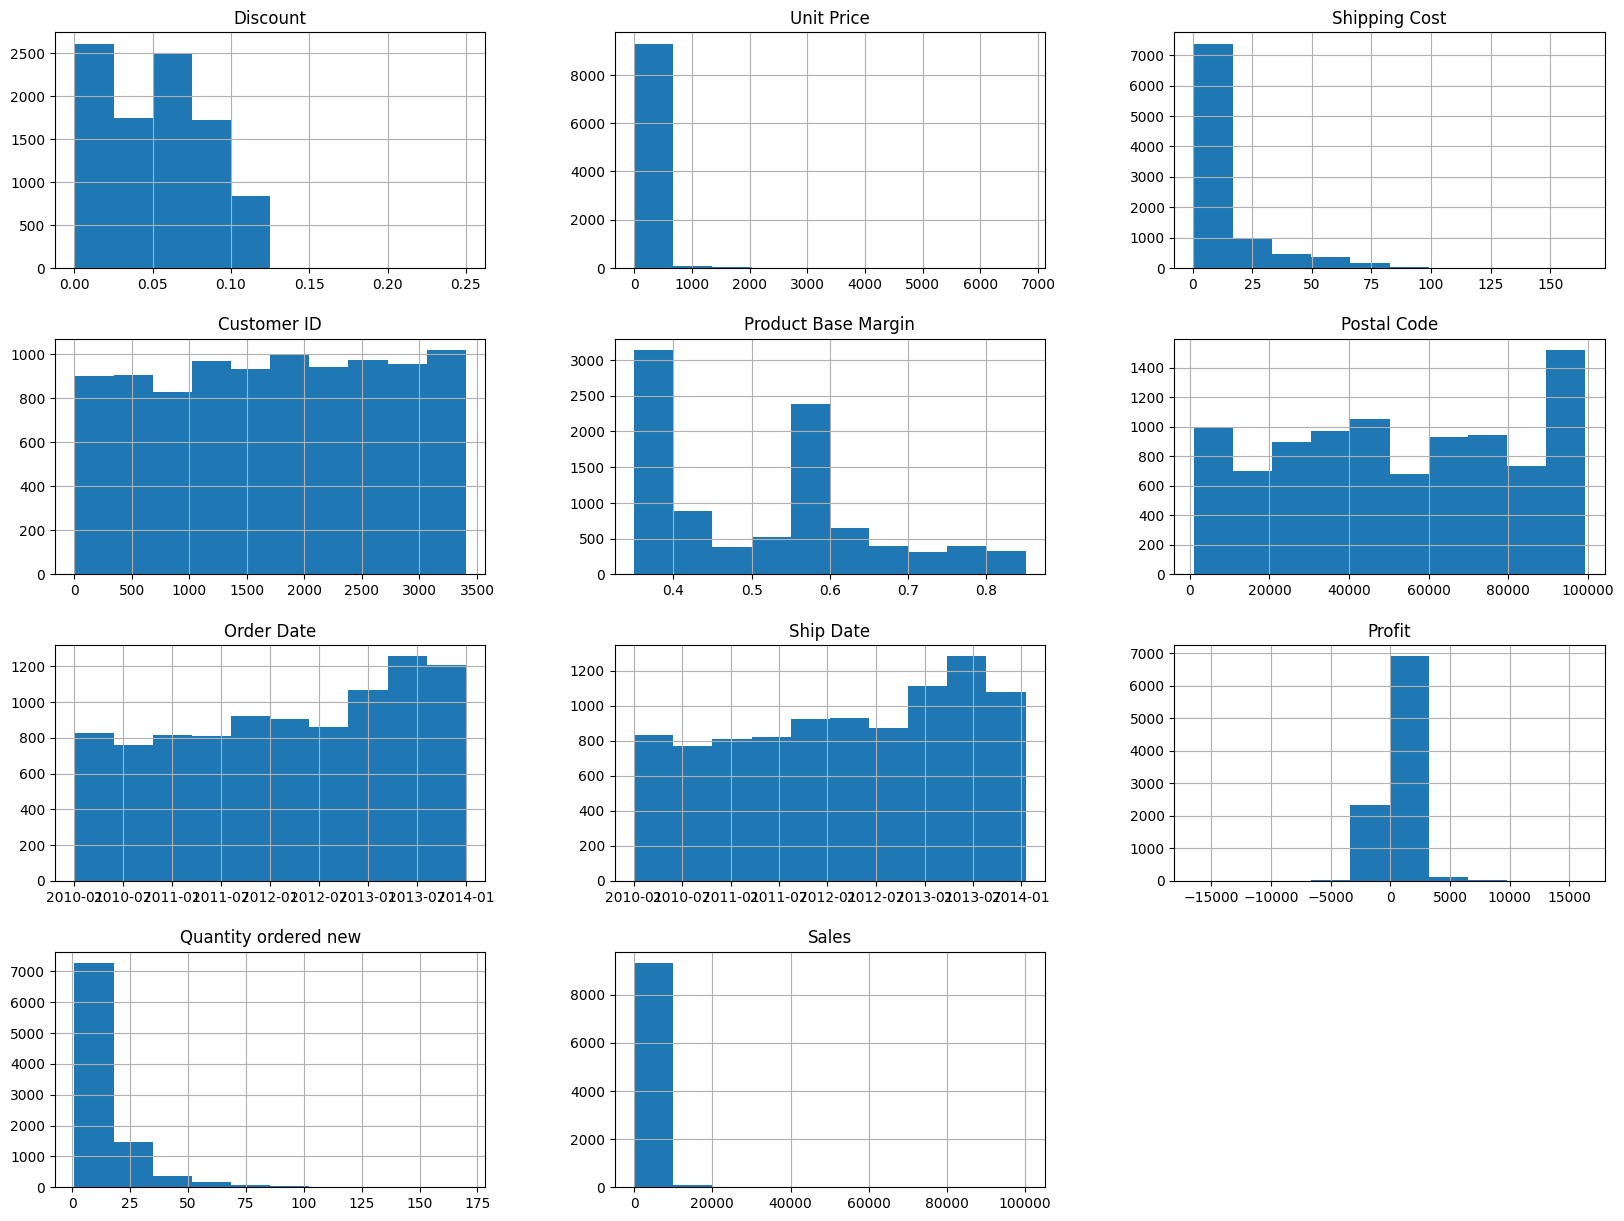

In [104]:

# Univariate analysis
data.hist(figsize=(20,15))
plt.show()


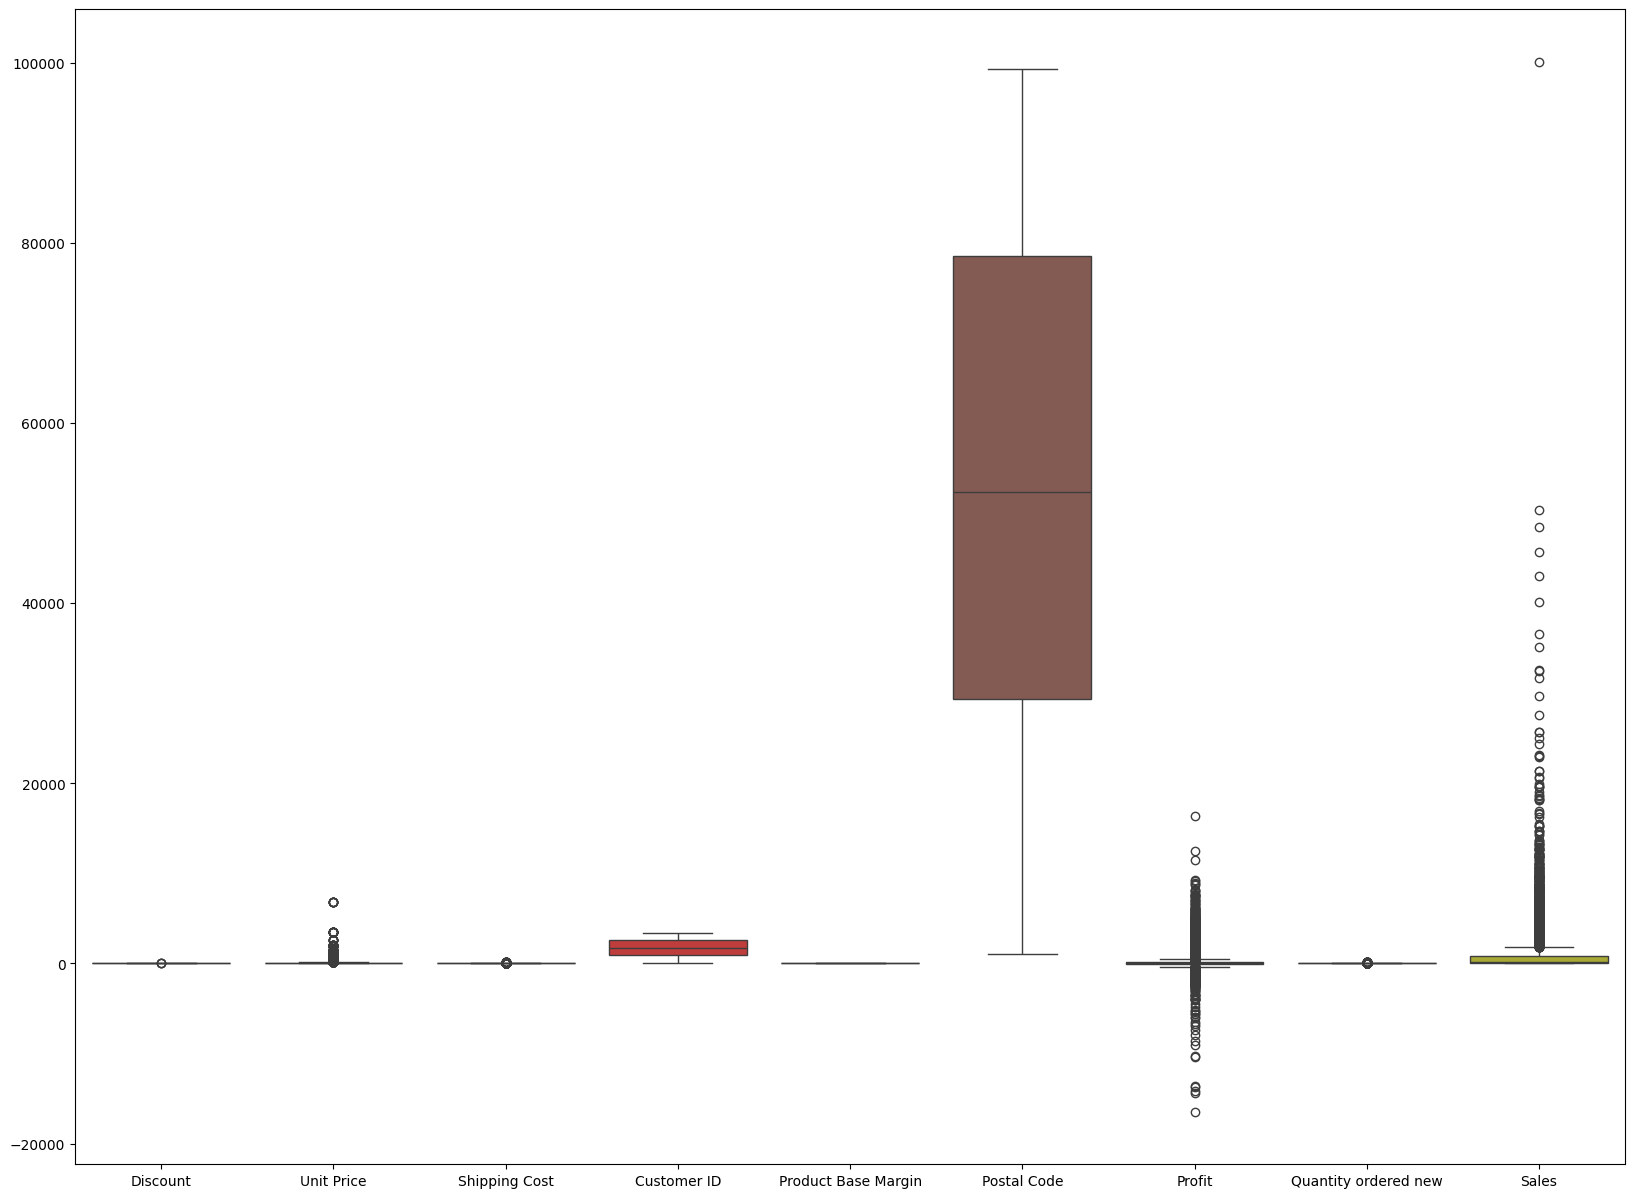

In [105]:
plt.figure(figsize=(20,15))
sns.boxplot(data)
plt.show()

<Axes: xlabel='Product Category', ylabel='count'>

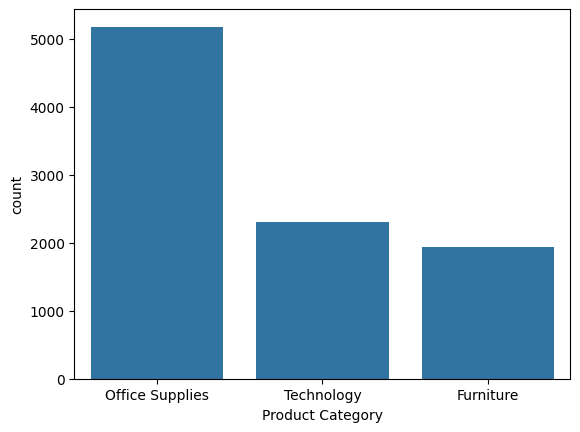

In [106]:
sns.countplot(x='Product Category',data=data)

In [107]:
data['Region'].value_counts()

,count
Region,
Central,2899
East,2289
West,2284
South,1954


In [108]:
data.columns

Index(['Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales'],
      dtype='object')

In [109]:
# Bivariate analysis

<Axes: xlabel='Sales', ylabel='Profit'>

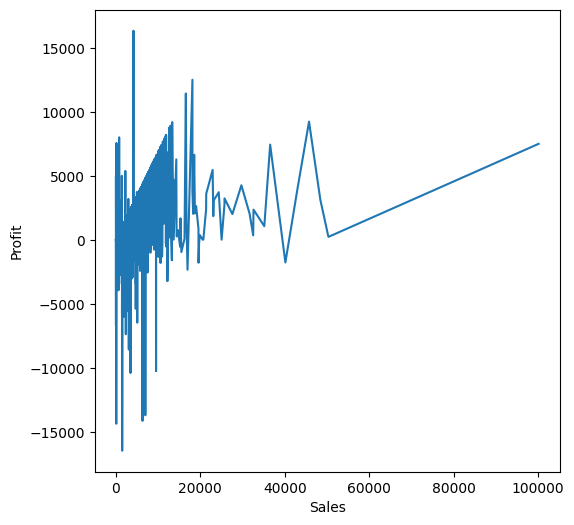

In [110]:
plt.figure(figsize=(6,6))
sns.lineplot(x=data['Sales'],y=data['Profit'])

<Axes: xlabel='Product Category', ylabel='Sales'>

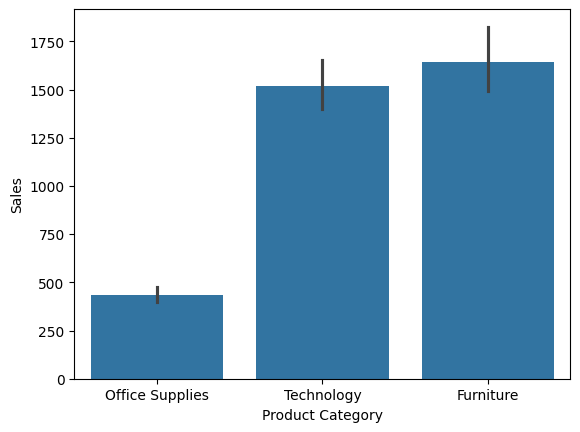

In [111]:
sns.barplot(x=data['Product Category'],y=data['Sales'])

<Axes: xlabel='Product Category', ylabel='Profit'>

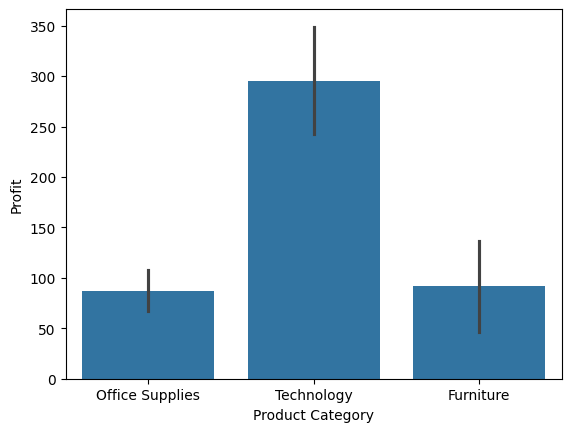

In [112]:
sns.barplot(x=data['Product Category'],y=data['Profit'])

<Axes: xlabel='Product Category', ylabel='count'>

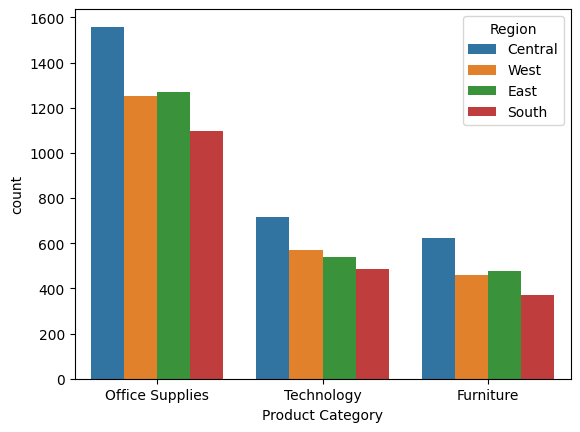

In [113]:
sns.countplot(x=data['Product Category'],hue=data["Region"])

In [114]:

# Summary statistics for key variables


### Not taught yet
# Grouped statistics


### Not taught yet





### Conclusion

- Summary of key findings.
- Insights based on the analysis.



## Additional Statistical Analysis


In [115]:
data['Region'].value_counts()

,count
Region,
Central,2899
East,2289
West,2284
South,1954


In [116]:

from scipy.stats import ttest_ind, chi2_contingency

# Example: T-test for sales in different regions


### Not taught yet


In [117]:
from scipy import stats

In [118]:
# Example: Chi-square test for independence between Ship Mode and Customer Segment

crosstab=pd.crosstab(data['Ship Mode'], data['Customer Segment'])

chi2_stat,p_val,dof,expected=stats.chi2_contingency(crosstab)

print(f'Chi2 Statistic: {chi2_stat}')
print(f'P-Value: {p_val}')
print(f'Degrees of Freedom: {dof}')


if p_val<0.05:
  print(f'Reject null hypothesis as Ship Mode and Customer Segment are dependend')
else:
  print(f'Accept null hypothesis as Ship Mode and Customer Segment are not dependend')



Chi2 Statistic: 1.6522944786735398
P-Value: 0.9487444717191827
Degrees of Freedom: 6
Accept null hypothesis as Ship Mode and Customer Segment are not dependend


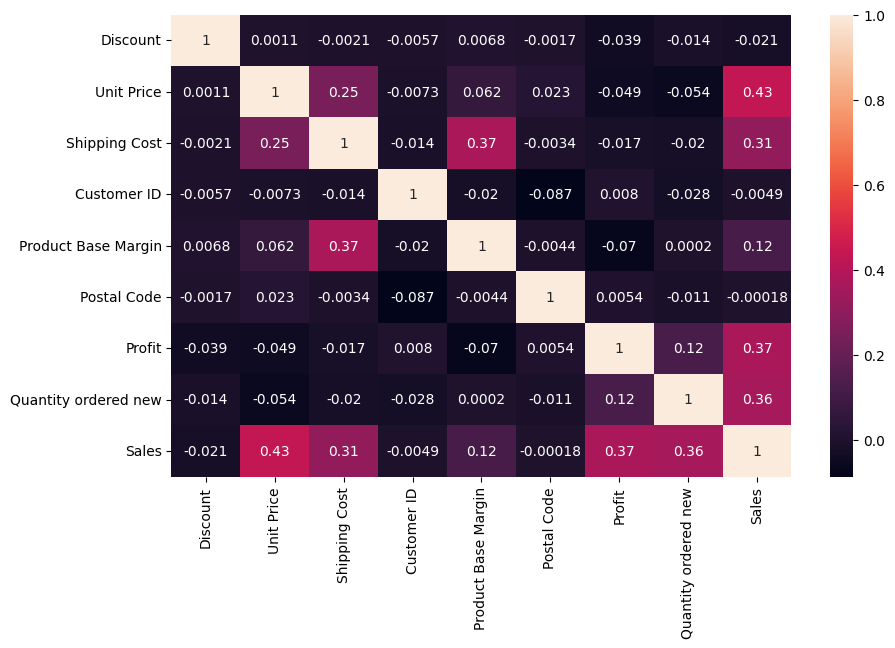

In [119]:
# Selecting only numeric columns for correlation matrix

numeric=data.select_dtypes(include=['number'])
correlation_matrix=numeric.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [120]:

import statsmodels.api as sm

# Example: Linear regression analysis for Sales prediction

### Not taught yet







In [121]:
data.columns

Index(['Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales'],
      dtype='object')

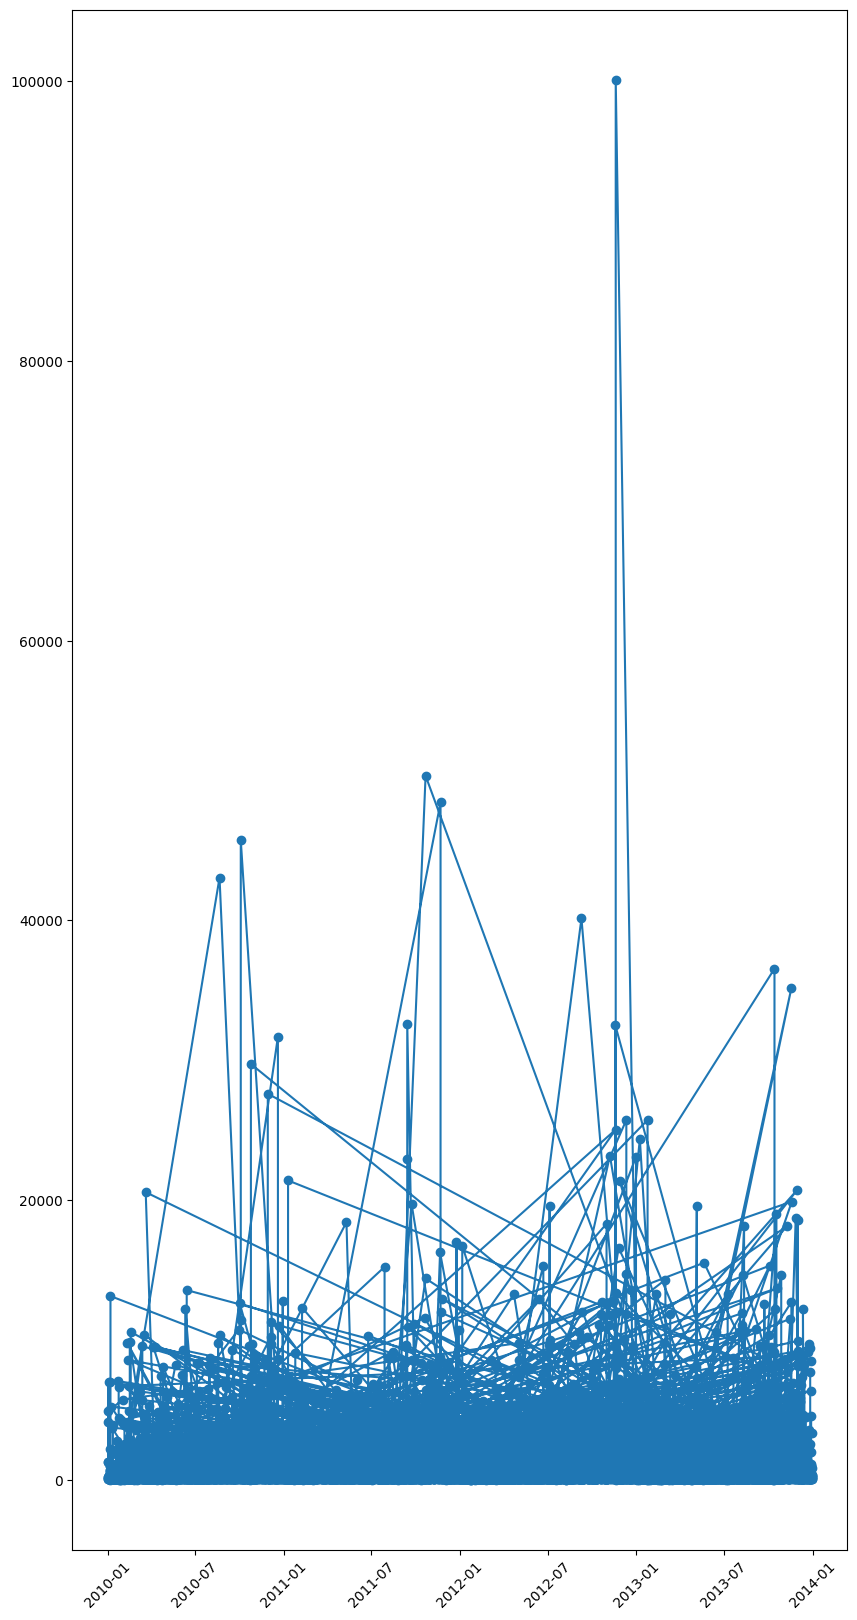

In [131]:

# Plotting sales trends over time
plt.figure(figsize=(10,20))
plt.plot(data['Order Date'],data['Sales'],marker='o',linestyle='-')
plt.xticks(rotation=45)
plt.show()



# Resample sales data by month


### Not taught yet





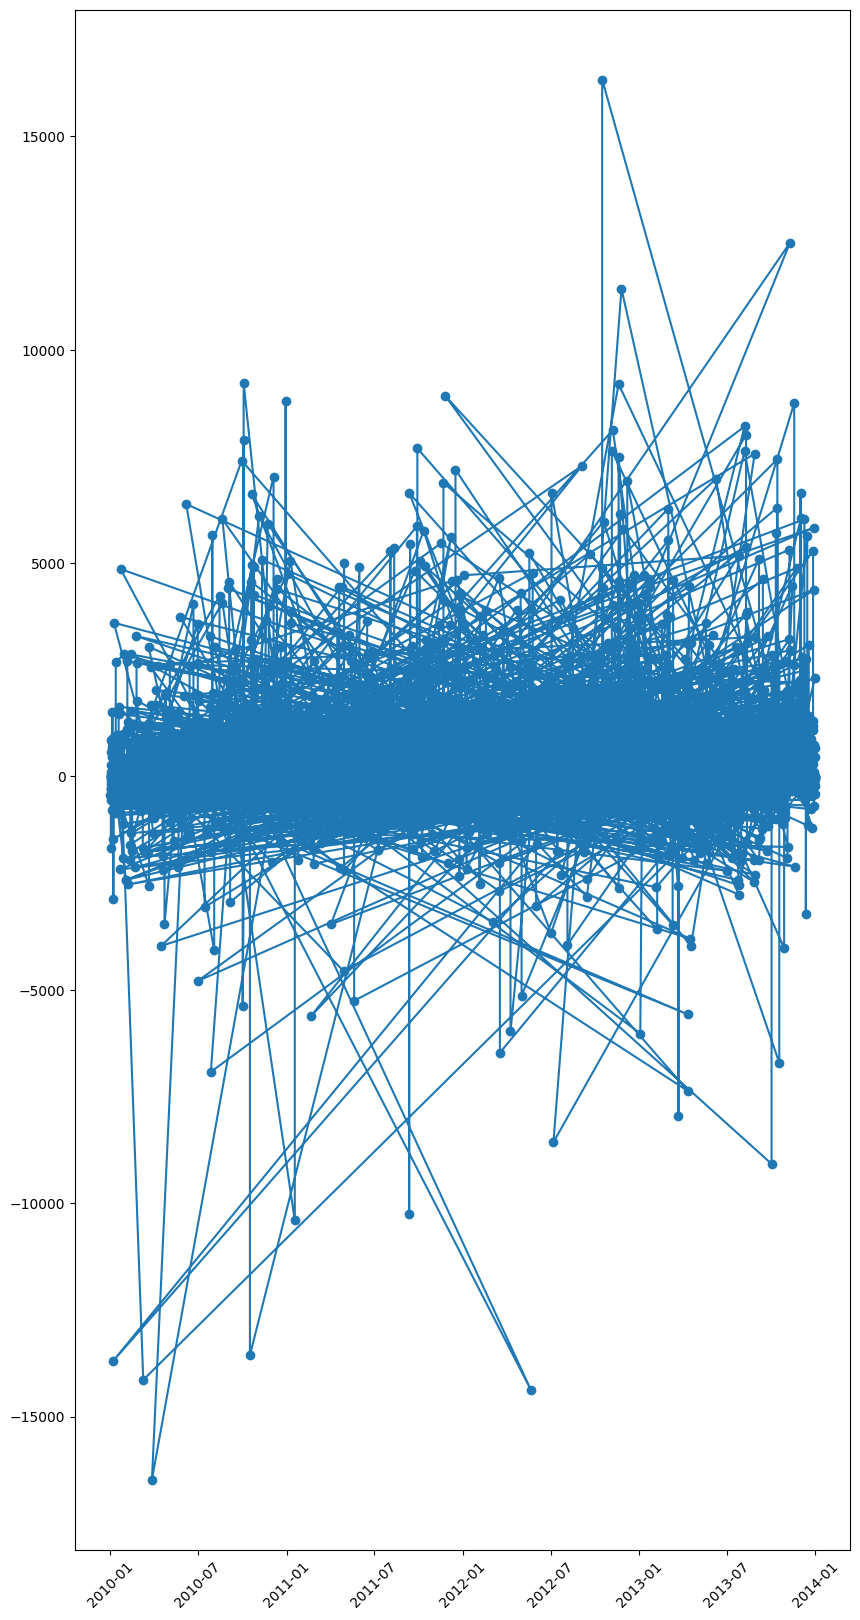

In [132]:

# Plotting profit trends over time


plt.figure(figsize=(10,20))
plt.plot(data['Order Date'],data['Profit'],marker='o',linestyle='-')
plt.xticks(rotation=45)
plt.show()





In [135]:

# Identifying top-performing product categories based on total sales and profit

aggregate=data.groupby('Product Category').agg({'Sales':sum,'Profit':sum}).reset_index()
sort_sales=aggregate.sort_values(by='Sales',ascending=False)
sort_profit=aggregate.sort_values(by='Profit',ascending=False)
print(sort_sales)

print(sort_profit)

  Product Category       Sales         Profit
2       Technology  3514982.03  683097.884748
0        Furniture  3178623.74  177354.298188
1  Office Supplies  2258325.55  451990.216492
  Product Category       Sales         Profit
2       Technology  3514982.03  683097.884748
1  Office Supplies  2258325.55  451990.216492
0        Furniture  3178623.74  177354.298188


<ipython-input-135-5c15f1373e91>:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  aggregate=data.groupby('Product Category').agg({'Sales':sum,'Profit':sum}).reset_index()
<ipython-input-135-5c15f1373e91>:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  aggregate=data.groupby('Product Category').agg({'Sales':sum,'Profit':sum}).reset_index()


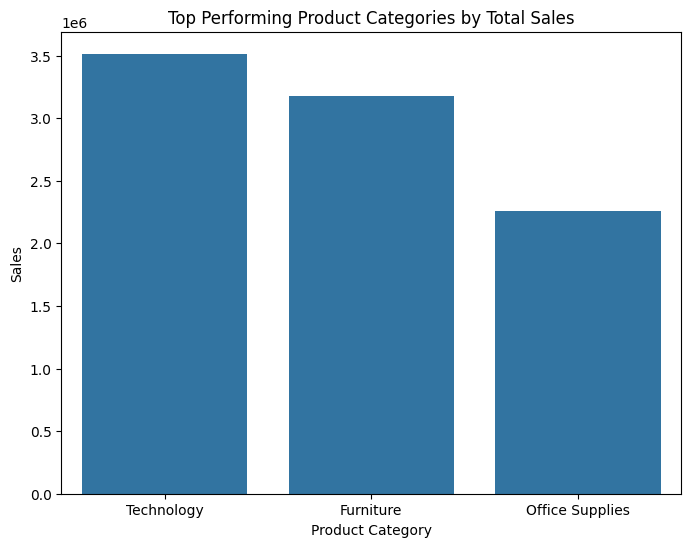

In [138]:
plt.figure(figsize=(8,6))
sns.barplot(data=sort_sales,x='Product Category',y='Sales')
plt.title('Top Performing Product Categories by Total Sales')
plt.show()

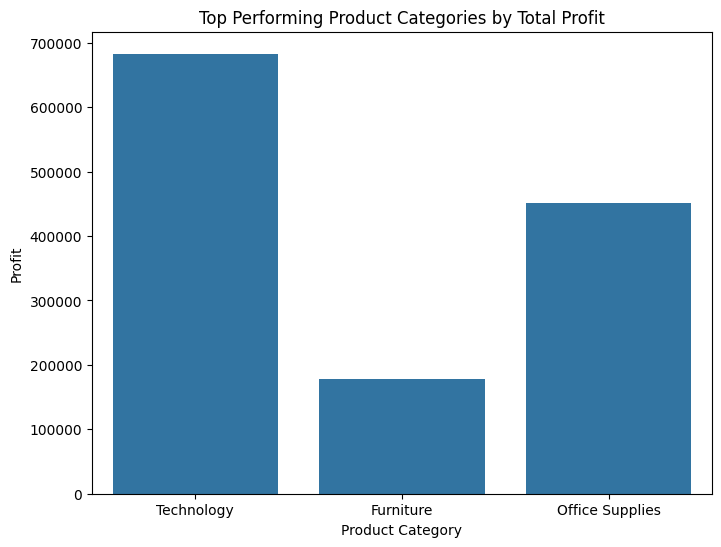

In [139]:
plt.figure(figsize=(8,6))
sns.barplot(data=sort_sales,x='Product Category',y='Profit')
plt.title('Top Performing Product Categories by Total Profit')
plt.show()

<Axes: xlabel='Product Category', ylabel='Sales'>

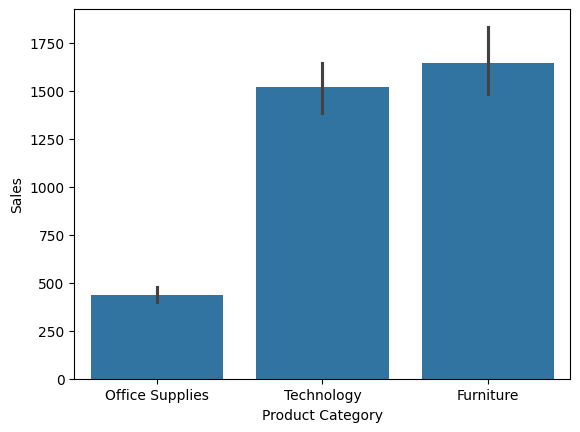

In [140]:
# Plotting total sales by product category

sns.barplot(x=data['Product Category'],y=data['Sales'])




<Axes: xlabel='Product Category', ylabel='Profit'>

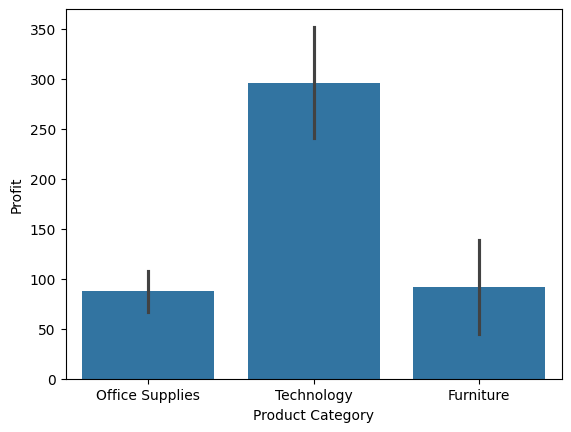

In [141]:
# Plotting total profit by product category

sns.barplot(x=data['Product Category'],y=data['Profit'])


In [142]:

# Generating summary statistics for each region

Region_Summary=data.groupby('Region').agg({'Sales':sum,'Profit':sum})
Region_Summary.sort_values(by='Sales',ascending=False)
Region_Summary


<ipython-input-142-39da7afc7466>:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  Region_Summary=data.groupby('Region').agg({'Sales':sum,'Profit':sum})
<ipython-input-142-39da7afc7466>:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  Region_Summary=data.groupby('Region').agg({'Sales':sum,'Profit':sum})


,Sales,Profit
Region,,
Central,2540341.62,519825.567067
East,2422804.68,377566.186045
South,1597346.22,104201.192420
West,2391438.80,310849.453897


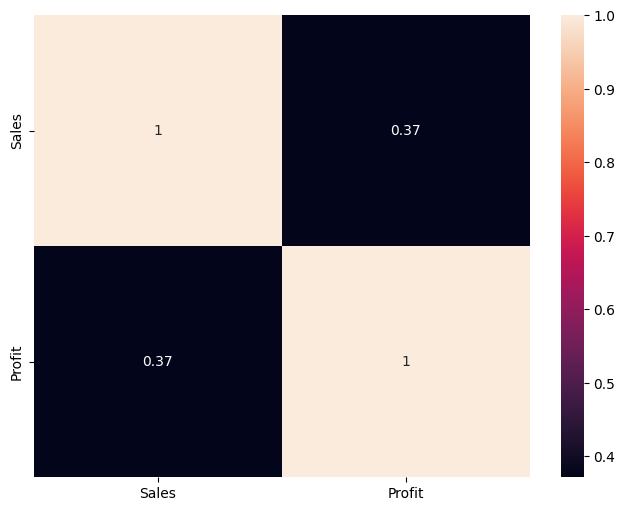

In [153]:

# Visualizing the correlation between sales and profit

Sales_Profit=data[['Sales','Profit']]
correlation=Sales_Profit.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation,annot=True)
plt.show()

In [154]:
# Displaying the correlation coefficient
Sales_Profit=data[['Sales','Profit']]
correlation=Sales_Profit.corr()
correlation

,Sales,Profit
Sales,1.000000,0.371583
Profit,0.371583,1.000000


In [127]:

# Analyzing seasonal sales trends




# Grouping sales data by month and year



# Plotting seasonal sales trends









In [156]:
data.columns

Index(['Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales'],
      dtype='object')

<Axes: xlabel='Ship Mode', ylabel='Sales'>

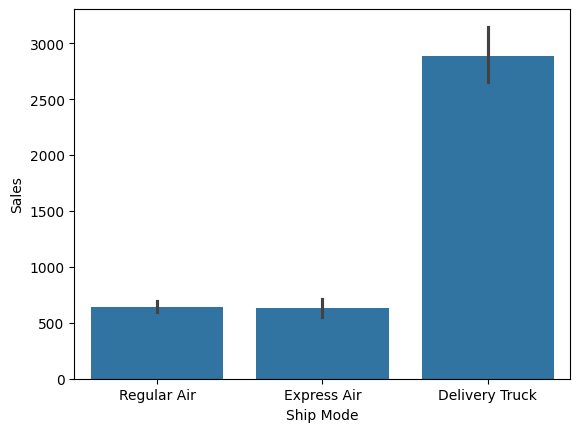

In [159]:

# Comparing sales across different ship modes
sns.barplot(x=data['Ship Mode'],y=data['Sales'])



In [ ]:
# Ensure column names are clean


# Print column names to verify


# Ensure 'Ship Date' column is datetime type


# Dropping rows where 'Ship Date' couldn't be converted


# Resample sales data by month









